<a href="https://colab.research.google.com/github/KValim/Projetcs/blob/main/FIAP/data%20science%20with%20python/Entrega3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Utilizando uma base de dados do Kaggle, realize uma Classificação com a Reg Logística ou Árvore de Decisão (caso na atividade anterior tenha já utilizado RegLog, utilize nesta Árvore). Não esqueça de separar treino e teste, bem como de calcular as devidas métricas. Em seguida, realize um processo de AutoML com H2O, e aí as métricas melhoraram?

# EDA

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [36]:
# Carregando os dados
url = "https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/data%20science%20with%20python/pima-indians-diabetes.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=column_names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


[Text(0.5, 0, 'Pregnancies'),
 Text(1.5, 0, 'Glucose'),
 Text(2.5, 0, 'BloodPressure'),
 Text(3.5, 0, 'SkinThickness'),
 Text(4.5, 0, 'Insulin'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'DiabetesPedigreeFunction'),
 Text(7.5, 0, 'Age'),
 Text(8.5, 0, 'Outcome')]

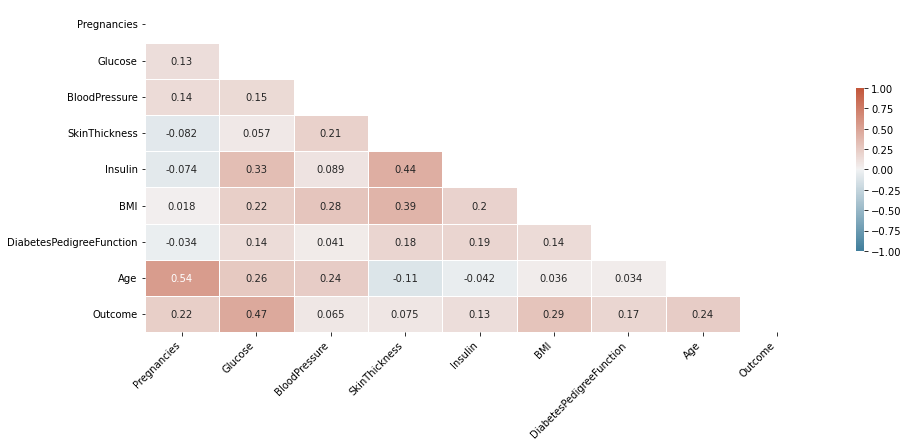

In [37]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (15, 6))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, 
                 vmin=-1, vmax=1, center=0, 
                 xticklabels = corr_mat.columns, 
                 yticklabels = corr_mat.columns, 
                 annot=True,
                 cmap=cmap,
                 linewidths=.5,
                 mask=mask,
                 cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

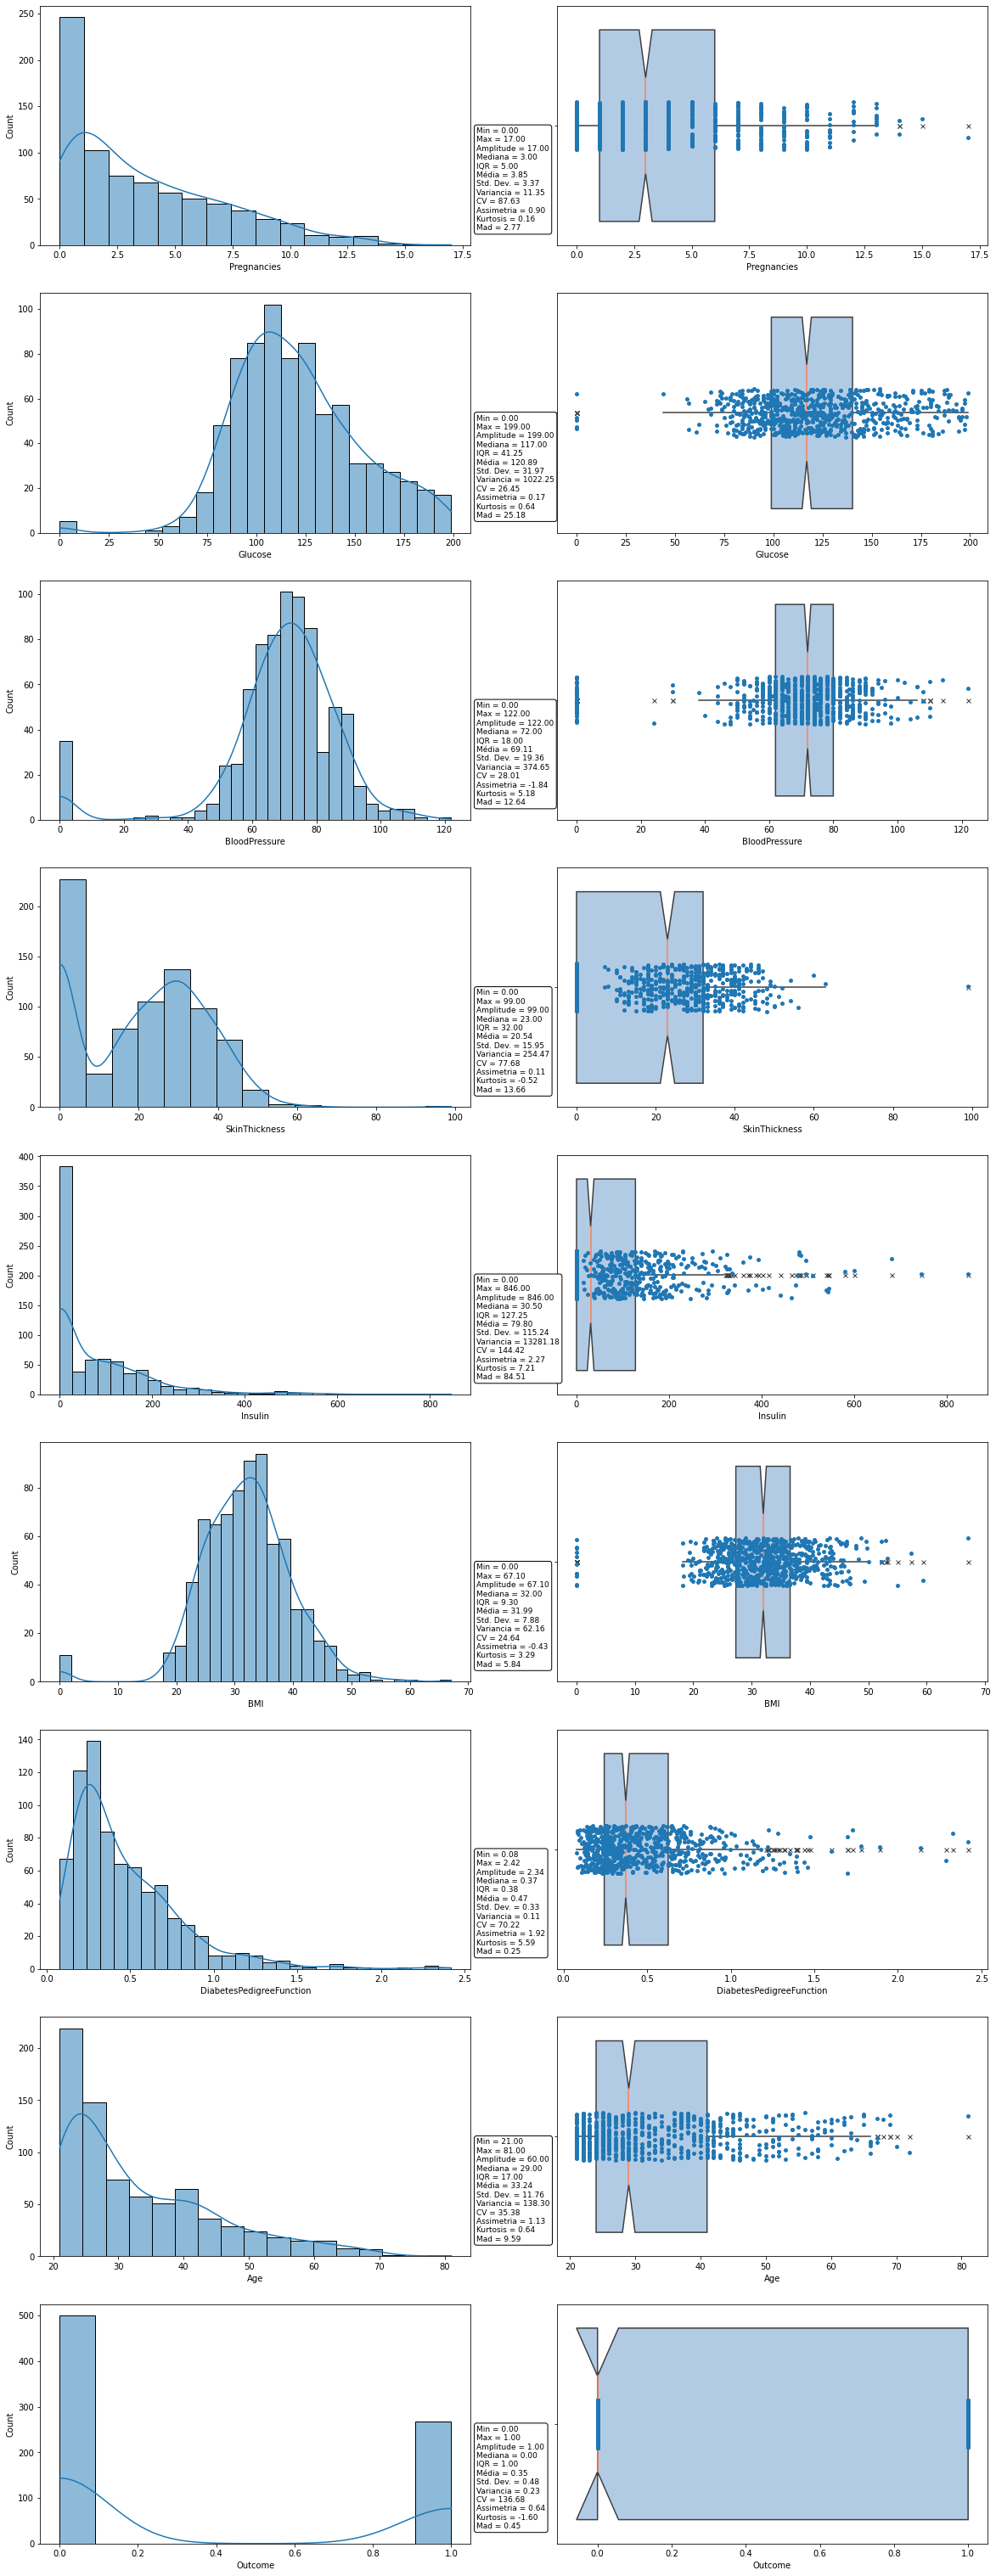

In [38]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
df = data
tamanho_figsize = len(df.columns)
fig, axes = plt.subplots(nrows=len(df.columns),ncols=2,  figsize=(20, 55))

for i in range(len(df.columns)):
    feature = df.columns[i]
    data=df.copy()
    
    kurt = data[feature].kurtosis()
    mean = data[feature].mean()
    median = data[feature].median()
    mode = data[feature].mode()[0]
    std_dev = data[feature].std()
    iqr = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    min_val = data[feature].min()
    max_val = data[feature].max()
    amplitude = data[feature].max() - data[feature].min()
    variance = data[feature].var()
    cv = data[feature].std() / data[feature].mean() * 100
    skewness = data[feature].skew()
    mad = np.abs(data[feature] - data[feature].mean()).mean()
    
    

    sns.histplot(x=data[feature], ax=axes[i][0], kde=True)
    

    hist_pos = axes[i][0].get_position()
    

    sns.boxplot(x=data[feature], ax=axes[i][1], notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
    sns.stripplot(x=data[feature], ax=axes[i][1])
    

    bbox_props = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    textstr = f'Min = {min_val:.2f}\nMax = {max_val:.2f}\nAmplitude = {amplitude:.2f}\nMediana = {median:.2f}\nIQR = {iqr:.2f}\nMédia = {mean:.2f}\nStd. Dev. = {std_dev:.2f}\nVariancia = {variance:.2f}\nCV = {cv:.2f}\nAssimetria = {skewness:.2f}\nKurtosis = {kurt:.2f}\nMad = {mad:.2f}'

    t = axes[i][1].text(hist_pos.x0 + 0.357, hist_pos.y0 + 0.0045, textstr, transform=fig.transFigure, bbox=bbox_props, fontsize=9)
    

# Regressão Logística & Árvore de Decisão

In [39]:
# Separar as variáveis independentes (X) e a variável alvo (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Árvore de Decisão
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)

# Métricas
def print_metrics(y_test, y_pred, model_name):
    print(f'Métricas para {model_name}:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1-Score: {f1_score(y_test, y_pred)}\n')

print_metrics(y_test, y_pred_log_reg, 'Regressão Logística')
print_metrics(y_test, y_pred_dec_tree, 'Árvore de Decisão')

Métricas para Regressão Logística:
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1-Score: 0.6548672566371682

Métricas para Árvore de Decisão:
Accuracy: 0.7532467532467533
Precision: 0.639344262295082
Recall: 0.7090909090909091
F1-Score: 0.6724137931034484



# H2O

In [40]:
#pip install h2o

In [41]:
# H2O AutoML
import h2o
from h2o.automl import H2OAutoML

# Inicializando o cluster H2O
h2o.init()

# Convertendo o DataFrame do pandas para um objeto H2OFrame
data_h2o = h2o.H2OFrame(data)

# Dividindo os dados em conjuntos de treinamento e teste
train, test = data_h2o.split_frame(ratios=[0.8], seed=42)

# Especificando a coluna alvo e as colunas de entrada
x = train.columns
y = 'Outcome'
x.remove(y)

# Convertendo a coluna alvo em categórica
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Executando o AutoML
automl = H2OAutoML(max_models=30, seed=42, max_runtime_secs=3600)
automl.train(x=x, y=y, training_frame=train)

lb = h2o.automl.get_leaderboard(automl, extra_columns = "ALL")

# Exibindo o melhor modelo
best_model = automl.leader
print(f'Melhor Modelo: {best_model}')

# Fazendo previsões com o melhor modelo
y_pred_automl = best_model.predict(test)

# Convertendo as previsões para um DataFrame do pandas
y_pred_automl_df = y_pred_automl.as_data_frame()

# Convertendo os conjuntos de teste e alvo em DataFrames do pandas
y_test_df = test[y].as_data_frame()
X_test_df = test.as_data_frame().drop(y, axis=1)

# Convertendo as previsões para um DataFrame do pandas
y_pred_automl_df = y_pred_automl['predict'].as_data_frame()

# Convertendo os conjuntos de teste e alvo em DataFrames do pandas
y_test_df = test[y].as_data_frame()
X_test_df = test.as_data_frame().drop(y, axis=1)

lb = h2o.automl.get_leaderboard(automl, extra_columns = "ALL")
m = automl.leader

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpujvsfpo_
  JVM stdout: /tmp/tmpujvsfpo_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpujvsfpo_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_6vbdj9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Melhor Modelo: Model Details
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20230326_232222_model_2


Status of Neuron Layers: predicting Outcome, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,102 weights/biases, 17.7 KB, 822,800 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms                momentum    mean_weight            weight_rms           mean_bias                bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ----------------------  ----------  ---------------------  -------------------  -----------------------  -------------------
    1        8        Input             0.0
    2        100      RectifierD

In [42]:
# df com os top10 modelos e suas métricas
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_grid_1_AutoML_1_20230326_232222_model_2,0.844464,0.484461,0.729324,0.215117,0.389244,0.151511,19554,0.038535,DeepLearning
StackedEnsemble_BestOfFamily_1_AutoML_1_20230326_232222,0.843108,0.464296,0.724545,0.220833,0.386044,0.14903,3928,0.086081,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230326_232222,0.836781,0.470247,0.714892,0.217866,0.390332,0.152359,3444,0.106723,StackedEnsemble
DeepLearning_grid_2_AutoML_1_20230326_232222_model_2,0.83649,0.480836,0.727432,0.235268,0.395158,0.15615,24010,0.036761,DeepLearning
GLM_1_AutoML_1_20230326_232222,0.836,0.473992,0.712184,0.235952,0.391275,0.153096,225,0.011298,GLM
DeepLearning_grid_3_AutoML_1_20230326_232222_model_2,0.835237,0.473055,0.736539,0.230454,0.390615,0.15258,29261,0.054045,DeepLearning
GBM_4_AutoML_1_20230326_232222,0.832518,0.475579,0.714638,0.247178,0.395264,0.156234,293,0.019668,GBM
XGBoost_grid_1_AutoML_1_20230326_232222_model_6,0.832124,0.484031,0.701692,0.24007,0.397299,0.157847,228,0.013395,XGBoost
GBM_5_AutoML_1_20230326_232222,0.832021,0.47593,0.727616,0.231145,0.395762,0.156627,310,0.019884,GBM
XGBoost_grid_1_AutoML_1_20230326_232222_model_4,0.831089,0.4787,0.718301,0.231139,0.394721,0.155805,199,0.013887,XGBoost


In [43]:
# finalizando o cluster H2O
h2o.cluster().shutdown()

H2O session _sid_93d1 closed.


# Conclusão

Métricas de desempenho do modelo para validação cruzada:

- MSE (Erro Quadrático Médio): 0.1515

- RMSE (Raiz do Erro Quadrático Médio): 0.3892

- LogLoss: 0.4845

- Erro Médio Por Classe: 0.2151

- AUC (Área sob a curva ROC): 0.8445

- AUCPR (Área sob a curva Precision-Recall): 0.7293

- Gini: 0.6889

Os valores de AUC (0.8445) e AUCPR (0.7293) indicam um bom desempenho do modelo na classificação, embora haja espaço para melhoria. A matriz de confusão mostra que o modelo tem um desempenho melhor na previsão da classe 1 (173 verdadeiros positivos e 35 falsos negativos) do que na previsão da classe 0 (293 verdadeiros negativos e 104 falsos positivos).

O resumo das métricas de validação cruzada (Cross-Validation Metrics Summary) mostra que, em média, o modelo tem uma acurácia de 0.7769, um AUC de 0.8492 e um F1-score de 0.7284. Essas métricas indicam um desempenho razoável do modelo.